In [38]:
#load data.bin

import suite2p as s2p
import numpy as np
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import os
os.sys.path.append("C:\\Users\\mplitt\\s2p_processing")
from s2p_preprocessing import sbxread

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
d = "G:\\My Drive\\2P_Data\\TwoTower\\4139224.3\\18_10_2018\\TwoTower_noTimeout\\TwoTower_noTimeout_003_006.sbx"
# ops = np.load(os.path.join(d,'ops1.npy')).all()
# ops['reg_file']=os.path.join(d,'data.bin')

In [42]:
# Ly = ops['Ly']
# Lx = ops['Lx']
# # ops['nframes'] = get_nFrames(ops)
# nbytesread = 2 * Ly * Lx * 1000


data = np.squeeze(sbxread(d,N=1000))
    

0


In [48]:
import scipy as sp
data_mf = sp.signal.medfilt(data,kernel_size=(1,1,13))

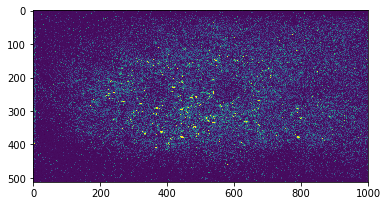

In [47]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig,ax = plt.subplots(figsize=(15,10))
im = ax.imshow(data_mf[0,:,:])
# l, = plt.plot([], [], 'k-o')

# plt.xlim(-5, 5)
# plt.ylim(-5, 5)

# x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(1000):
#         x0 += 0.1 * np.random.randn()
#         y0 += 0.1 * np.random.randn()
        im.set_data(data_mf[:,:,i])
        writer.grab_frame()